Twitter Anaylsis - CSV Tables

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import pandas as pd
import scipy.stats as st
import numpy as np
import glob

In [2]:
csv_file_list = ['csv_output/Twitter_API_Table1.csv','csv_output/Twitter_API_Table2.csv']

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

merged_df

,Unnamed: 0,id,author_id,lang,text,title,created_at,url,source,normalized_text,...,tag 2,tag 3,tag 4,Mentions Total,retweet count,reply count,like count,quote count,possibly_sensitive,tag 5
0,0,1453472698349326338,197257623,en,RT @FortuneMagazine: MTN is making its network...,NaN,2021-10-27T21:24:30.000Z,NaN,Twitter for Android,MTN,...,NaN,NaN,NaN,1,18,0,0,0,True,NaN
1,1,1453472665193394189,1318432664496623616,en,Amazon​.de: AMD Ryzen 9 5950X Box\n🔗 https://t...,AMD Ryzen 9 5950X Box,2021-10-27T21:24:22.000Z,https://t.co/q3rMN5ihRx,Twitter,NaN,...,partalert,pa_ryzen5950x,NaN,0,0,0,0,0,False,NaN
2,2,1453472656682991617,1018893163925331968,en,RT @TeamSChandna: Watch #SurbhiChandna's new #...,NaN,2021-10-27T21:24:20.000Z,NaN,Twitter Web App,Vitamin C Face Serum,...,Ad,RoseAndGold,NaN,2,29,0,0,0,False,NaN
3,3,1453472634319122433,705402063728017408,en,Gardenrooms and sheds to read your books.. #ga...,Rowlinson Easy Fix Spiked Border Roll 1.8m - P...,2021-10-27T21:24:14.000Z,https://t.co/tur73NW2bY,Twitter,NaN,...,ad,shed,NaN,0,0,0,0,0,False,NaN
4,4,1453472610553974786,3889570332,en,RT @studiosounds: #Listen to Dayne S - Moments...,Moments - EP by Dayne S,2021-10-27T21:24:09.000Z,https://t.co/NpunFEBHiR,Twitter Web App,Dayne S,...,Dance,AD,NaN,1,1,0,0,0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,95,1453475917800607744,4846392425,en,RT @davelackie: I'm co-hosting the Beauty's Be...,NaN,2021-10-27T21:37:17.000Z,NaN,Twitter Web App,NaN,...,NaN,NaN,NaN,1,213,0,0,0,False,NaN
82,96,1453475885051482124,4846392425,en,RT @davelackie: Excited to be co-hosting the B...,NaN,2021-10-27T21:37:09.000Z,NaN,Twitter Web App,NaN,...,NaN,NaN,NaN,1,68,0,0,0,False,NaN
83,97,1453475881486192643,1122250512902934528,en,RT @falcodrin: 🔥 BESTBUY : XFX Radeon RX 6600 ...,NaN,2021-10-27T21:37:09.000Z,https://t.co/EHtgTkhpNI,Twitter for Android,XFX Radeon RX 6600 XT Speedster QICK308,...,NaN,NaN,NaN,1,1,0,0,0,False,NaN
84,98,1453475866957139969,1349702570739183618,en,"Apple 13"" MacBook Air Silver | 1.6GHz i5 16GB ...",NaN,2021-10-27T21:37:05.000Z,https://t.co/Z4TSHkiPG6,dlvr.it,Apple 13,...,refurbished,deals,NaN,0,0,0,0,0,False,NaN


In [3]:
merged_total_df = merged_df.drop(['Unnamed: 0'], axis=1)
merged_total_df

,id,author_id,lang,text,title,created_at,url,source,normalized_text,type,...,tag 2,tag 3,tag 4,Mentions Total,retweet count,reply count,like count,quote count,possibly_sensitive,tag 5
0,1453472698349326338,197257623,en,RT @FortuneMagazine: MTN is making its network...,NaN,2021-10-27T21:24:30.000Z,NaN,Twitter for Android,MTN,Organization,...,NaN,NaN,NaN,1,18,0,0,0,True,NaN
1,1453472665193394189,1318432664496623616,en,Amazon​.de: AMD Ryzen 9 5950X Box\n🔗 https://t...,AMD Ryzen 9 5950X Box,2021-10-27T21:24:22.000Z,https://t.co/q3rMN5ihRx,Twitter,NaN,NaN,...,partalert,pa_ryzen5950x,NaN,0,0,0,0,0,False,NaN
2,1453472656682991617,1018893163925331968,en,RT @TeamSChandna: Watch #SurbhiChandna's new #...,NaN,2021-10-27T21:24:20.000Z,NaN,Twitter Web App,Vitamin C Face Serum,Product,...,Ad,RoseAndGold,NaN,2,29,0,0,0,False,NaN
3,1453472634319122433,705402063728017408,en,Gardenrooms and sheds to read your books.. #ga...,Rowlinson Easy Fix Spiked Border Roll 1.8m - P...,2021-10-27T21:24:14.000Z,https://t.co/tur73NW2bY,Twitter,NaN,NaN,...,ad,shed,NaN,0,0,0,0,0,False,NaN
4,1453472610553974786,3889570332,en,RT @studiosounds: #Listen to Dayne S - Moments...,Moments - EP by Dayne S,2021-10-27T21:24:09.000Z,https://t.co/NpunFEBHiR,Twitter Web App,Dayne S,Person,...,Dance,AD,NaN,1,1,0,0,0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1453475917800607744,4846392425,en,RT @davelackie: I'm co-hosting the Beauty's Be...,NaN,2021-10-27T21:37:17.000Z,NaN,Twitter Web App,NaN,NaN,...,NaN,NaN,NaN,1,213,0,0,0,False,NaN
82,1453475885051482124,4846392425,en,RT @davelackie: Excited to be co-hosting the B...,NaN,2021-10-27T21:37:09.000Z,NaN,Twitter Web App,NaN,NaN,...,NaN,NaN,NaN,1,68,0,0,0,False,NaN
83,1453475881486192643,1122250512902934528,en,RT @falcodrin: 🔥 BESTBUY : XFX Radeon RX 6600 ...,NaN,2021-10-27T21:37:09.000Z,https://t.co/EHtgTkhpNI,Twitter for Android,XFX Radeon RX 6600 XT Speedster QICK308,Product,...,NaN,NaN,NaN,1,1,0,0,0,False,NaN
84,1453475866957139969,1349702570739183618,en,"Apple 13"" MacBook Air Silver | 1.6GHz i5 16GB ...",NaN,2021-10-27T21:37:05.000Z,https://t.co/Z4TSHkiPG6,dlvr.it,Apple 13,Product,...,refurbished,deals,NaN,0,0,0,0,0,False,NaN


In [4]:
merged_total_df.to_csv('csv_output/Twitter_API_Merged_Table.csv')

Time Vs. Retweets

In [5]:
df_created=merged_total_df['created_at'].apply(pd.Series)
df_created

,0
0,2021-10-27T21:24:30.000Z
1,2021-10-27T21:24:22.000Z
2,2021-10-27T21:24:20.000Z
3,2021-10-27T21:24:14.000Z
4,2021-10-27T21:24:09.000Z
...,...
81,2021-10-27T21:37:17.000Z
82,2021-10-27T21:37:09.000Z
83,2021-10-27T21:37:09.000Z
84,2021-10-27T21:37:05.000Z


In [6]:
df_created2= df_created[0].str.split("T", n = -1, expand = True)
df_created2

,0,1
0,2021-10-27,21:24:30.000Z
1,2021-10-27,21:24:22.000Z
2,2021-10-27,21:24:20.000Z
3,2021-10-27,21:24:14.000Z
4,2021-10-27,21:24:09.000Z
...,...,...
81,2021-10-27,21:37:17.000Z
82,2021-10-27,21:37:09.000Z
83,2021-10-27,21:37:09.000Z
84,2021-10-27,21:37:05.000Z


In [7]:
df_created2["date"]=df_created2[0]
df_created2["time"]=df_created2[1]
df_created2.drop(columns=[0,1], inplace = True)
df_created2

,date,time
0,2021-10-27,21:24:30.000Z
1,2021-10-27,21:24:22.000Z
2,2021-10-27,21:24:20.000Z
3,2021-10-27,21:24:14.000Z
4,2021-10-27,21:24:09.000Z
...,...,...
81,2021-10-27,21:37:17.000Z
82,2021-10-27,21:37:09.000Z
83,2021-10-27,21:37:09.000Z
84,2021-10-27,21:37:05.000Z


In [8]:
df_created2['retweet count'] = merged_total_df['retweet count'].values
df_created2

,date,time,retweet count
0,2021-10-27,21:24:30.000Z,18
1,2021-10-27,21:24:22.000Z,0
2,2021-10-27,21:24:20.000Z,29
3,2021-10-27,21:24:14.000Z,0
4,2021-10-27,21:24:09.000Z,1
...,...,...,...
81,2021-10-27,21:37:17.000Z,213
82,2021-10-27,21:37:09.000Z,68
83,2021-10-27,21:37:09.000Z,1
84,2021-10-27,21:37:05.000Z,0


In [9]:
df_sort= df_created2.sort_values(by=["time"], ascending=False)
df_sort

,date,time,retweet count
0,2021-10-27,21:42:28.000Z,177
1,2021-10-27,21:42:28.000Z,2
2,2021-10-27,21:42:26.000Z,0
3,2021-10-27,21:42:22.000Z,0
4,2021-10-27,21:42:01.000Z,177
...,...,...,...
73,2021-10-27,21:21:37.000Z,0
75,2021-10-27,21:21:33.000Z,86
76,2021-10-27,21:21:32.000Z,7
77,2021-10-27,21:21:30.000Z,1


In [10]:
df_sort2 = df_sort.iloc[::9, :]
df_sort3 = df_sort2.sort_values(by=["time"], ascending=True)
df_sort3

,date,time,retweet count
76,2021-10-27,21:21:32.000Z,7
67,2021-10-27,21:21:53.000Z,167
59,2021-10-27,21:22:18.000Z,0
49,2021-10-27,21:22:46.000Z,0
40,2021-10-27,21:23:03.000Z,0
31,2021-10-27,21:23:19.000Z,0
22,2021-10-27,21:23:37.000Z,0
13,2021-10-27,21:23:47.000Z,167
4,2021-10-27,21:24:09.000Z,1
81,2021-10-27,21:37:17.000Z,213


<function matplotlib.pyplot.show(close=None, block=None)>

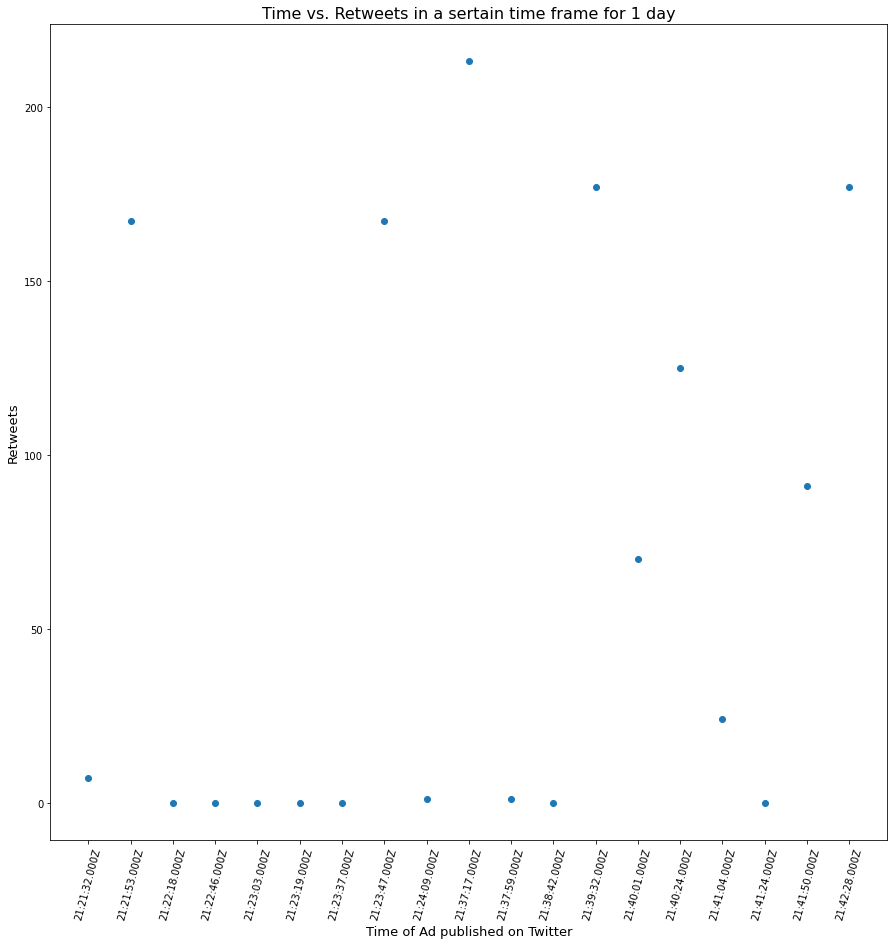

In [12]:
fig=plt.figure(figsize=(15,15))
plt.scatter(df_sort3['time'], df_sort3["retweet count"])
plt.title("Time vs. Retweets in a sertain time frame for 1 day", fontsize=16)
plt.xlabel("Time of Ad published on Twitter", fontsize=13)
plt.ylabel("Retweets", fontsize=13)
#plt.ylim(0,200)
plt.xticks(rotation=75)
plt.savefig("API_images/Timevs.Retweets_final.png")
plt.show

There seems to be little correlation between the amount of retweets as the day progresses. However, as the night goes on, at around 9:40pm, there is a spike in retweets in ads. The caveat of this data is that I did not have time to run this API mutliple times on multiple days to get a large sample size.

In [24]:
#mean, median, mode, and standard deviation of retweet counts of the entire dataset
df_sort.describe()

,retweet count
count,165.000000
mean,121.230303
std,1089.923944
min,0.000000
25%,0.000000
50%,2.000000
75%,23.000000
max,13961.000000


Average retweet per #ad is around 121 retweets. However, this also shows a relatively high variation, which is likely due to the dataset only being pulled for 1 day at a certain hour. 

In [25]:
#sort data by the snipet of data from scatter plot
df_sort3.describe()

,retweet count
count,19.000000
mean,64.210526
std,79.896168
min,0.000000
25%,0.000000
50%,7.000000
75%,146.000000
max,213.000000


Average retweet per #ad of the condensed data used for the scatter plot is around 64 retweets. However, this also shows a relatively high variation as well, which is likely due to the dataset only being pulled for 1 day at a certain hour. 

In [26]:
merged_total_df['like count'].describe()

count    165.000000
mean       0.345455
std        2.558235
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       25.000000
Name: like count, dtype: float64

Like per #ad is less than 1, meaning at this time of day/time, it is very unlikely for an ad to get any likes. This could be due to the fact that this ad was run around 10pm on a Wednesday night.  Standard deviation is also has a relatively high variation. Again, this is likely due to the dataset only being pulled for 1 day at a certain hour. 

Time vs. Source

In [27]:
#Time vs. Source
source_count = merged_total_df["source"].unique()
source_count

array(['Twitter for Android', 'Twitter', 'Twitter Web App',
       'Twitter for iPhone', 'Twitter for iPad', 'Tweetlogix', 'Stonky69',
       'Buffer', 'comichaveli', 'RT #MachineLearning', 'Lewie',
       'Twitter Media Studio', 'TweetDeck', 'Sprinklr', 'Hootsuite Inc.',
       'dlvr.it'], dtype=object)

In [28]:
source_count2=merged_total_df["source"].value_counts()
source_count2

Twitter Web App         42
Twitter                 36
Twitter for Android     36
Twitter for iPhone      27
Stonky69                 8
TweetDeck                5
Twitter for iPad         2
Sprinklr                 1
comichaveli              1
Lewie                    1
Buffer                   1
Twitter Media Studio     1
Tweetlogix               1
RT #MachineLearning      1
Hootsuite Inc.           1
dlvr.it                  1
Name: source, dtype: int64

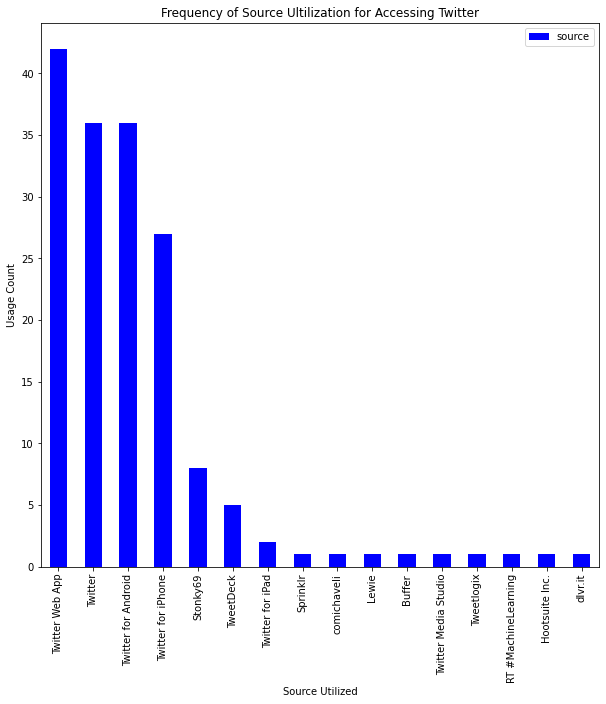

The most frequently utilized source is the Twitter Web App.


In [29]:
source_count2.plot(kind="bar", figsize=(10,10), color = "b",legend=True)
plt.ylabel("Usage Count")
plt.xlabel("Source Utilized")
plt.title("Frequency of Source Ultilization for Accessing Twitter")
plt.savefig('API_images/Frequency of Source Ultilization for Accessing Twitter.png')
plt.show()

print("The most frequently utilized source is the Twitter Web App.")

Mentions vs. Retweets

Mentions count = mention or someone "quote tweeting" of the #ad posted

In [30]:
#mentions_total vs. retweets correlation 
#number of hashtag/mention totals have correlation to retweets/engagement levels? 

mentions_df=merged_total_df['Mentions Total'].apply(pd.Series)
mentions_df

,0
0,1
1,0
2,2
3,0
4,1
...,...
81,1
82,1
83,1
84,0


In [37]:
# Convert the column name into "Mention Total"
mentions_df = mentions_df.rename(
    columns={"Mentions Count Total": "Mentions Total"})
mentions_df

,0,retweet count
0,1,18
1,0,0
2,2,29
3,0,0
4,1,1
...,...,...
81,1,213
82,1,68
83,1,1
84,0,0


In [38]:
mentions_df['retweet count'] = merged_total_df['retweet count'].values
mentions_df

,0,retweet count
0,1,18
1,0,0
2,2,29
3,0,0
4,1,1
...,...,...
81,1,213
82,1,68
83,1,1
84,0,0


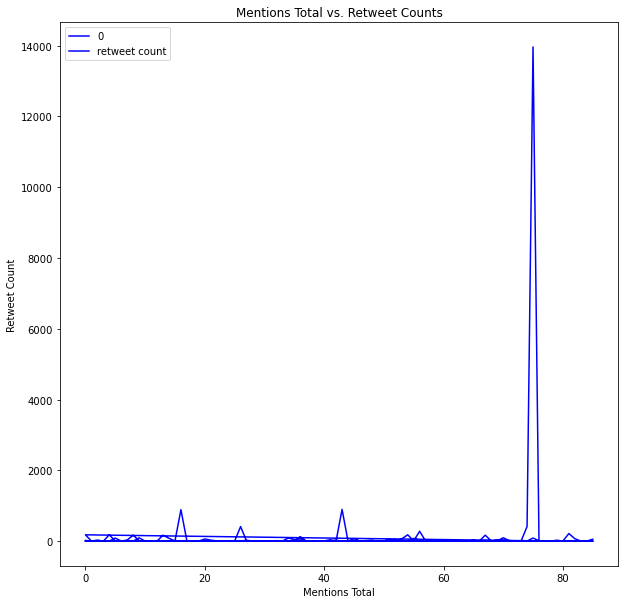

In [39]:
#set-up line chart to show how many instances mentions potentially influenced retweets and vice versa 

mentions_df.plot(kind="line", figsize=(10,10), color = "b", legend=True)
plt.ylabel("Retweet Count")
plt.xlabel("Mentions Total")
plt.title("Mentions Total vs. Retweet Counts")
plt.savefig("API_Images/Mentions Total Vs. Retweet Counts Line.png")

From this graph, you can infer that the more number of mentions of that your ad gets, the more retweets of your orignal #ad post. Also, this means that more people will see your ad on Twitter and engage in your post.